Implement simulated annealing for the travelling salesman. As
proposal, permute two random stations on the route. As
cooling scheme, you can use e.g. Tk = 1/√(1 + k). or Tk = − log(k + 1), feel free to experiment with different choices. The route must end where it started. Initialise with a random permutation of stations.

<h>(a) Have input be positions in the plane of the n stations. Let the cost of going i->j be the Euclidian distance between station i and j. Plot the resulting route in the plane. Debug with stations on a circle.</h>

In [167]:
import numpy as np 

def construct_station_permutation(n):
    #returns a random 1D-permutation of stations between [1,n]
    return np.random.permutation(n)+1
    

def convert_to_cost_matrix(permutation):
    #construct the i,j cost-matrix as euclidean distance, ie. row 1 is cost of going from station 0 to station j
    #the diagonal is zero. i is town from - j is town to
    n = permutation.shape[0]
    dists = np.zeros((n,n)).astype(int)
    for i in range(n):
        for j in range(n):
            if(i!=j):
                dists[i,j] = abs(permutation[i]-permutation[j])

    return dists 

def flip_candidate_index(x1,idx):
    #flips two stations 
    x_flip = np.copy(x1)
    p1 = idx[0]
    p2 = idx[1]
    #print(p1,p2)
    idx1 = np.where(x1==p1)[0]
    idx2 = np.where(x1==p2)[0]
    #print(idx1)
    #print(idx2)
    tmp = x1[idx1]
    x_flip[idx1] = x1[idx2]
    x_flip[idx2] = tmp
    #print("old array: ",x1)
    #print("new array: ",x_flip)
    return x_flip
    


def compute_cost(permutation):###compute cost 
    costs = convert_to_cost_matrix(permutation)
    total_cost = np.sum(np.diag(costs,k=1))
    total_cost += costs[-1,0] #need to travel back to first point 
    return total_cost
    
def run_simulated_annealing(max_iter, n, temperaturescheme):
    #generate a candidate 
    x = construct_station_permutation(n)
    costs = []
    temperatures = []
    costs.append(compute_cost(x))
    acceptance_probability = lambda UYi,UXi,Ti: np.exp(-(UYi-UXi)/Ti)
    temperatureUpdateSqrt = lambda k: 1/(np.sqrt(1+k))
    temperatureUpdateLog = lambda k: np.log(k+1)/k
    
    for i in range(1,max_iter):
        #get iterate temperature
        if(temperaturescheme=="sqrt"):
            T = temperatureUpdateSqrt(i)
        elif(temperaturescheme=="log"):
            T = temperatureUpdateLog(i)

        candidate_flip = (np.random.permutation(n)+1)[0:2] #generate candidate-flip
        #print("Candidate flip: ",candidate_flip)
        #generate candidate-point
        xc = flip_candidate_index(x,candidate_flip)
        #get costs
        original_cost = compute_cost(x)
        candidate_cost = compute_cost(xc)
        #print("Costs are: ",original_cost,candidate_cost)
        #print("Temperature is: ",T)
        #acceptance-check:
        if(candidate_cost<original_cost): #acceptance step
            x = xc 
        else:
            #generate acceptance probability
            p = acceptance_probability(candidate_cost,original_cost,T)
            #print("P is: ",p)
            U = np.random.uniform() #lottery draw
            if(U<=p): #accept with probability
                x = xc
            else:
                pass
        costs.append(compute_cost(x))
        temperatures.append(T)
    return x,costs,temperatures


stations = construct_station_permutation(4)
print(stations)
dists = convert_to_cost_matrix(stations)
print(dists)

print(compute_cost(stations))

[3 4 2 1]
[[0 1 1 2]
 [1 0 2 3]
 [1 2 0 1]
 [2 3 1 0]]
6


In [54]:
x1 = construct_station_permutation(4)
print(x1)
print(convert_to_cost_matrix(x1))
print(compute_cost(x1))

x2 = construct_station_permutation(4)
print(x2)
print(convert_to_cost_matrix(x2))
print(compute_cost(x2))

[2 3 1 4]
[[0 1 1 2]
 [1 0 2 1]
 [1 2 0 3]
 [2 1 3 0]]
8
[3 4 2 1]
[[0 1 1 2]
 [1 0 2 3]
 [1 2 0 1]
 [2 3 1 0]]
6


DEBUG CANDIDATE FLIP

In [112]:
n = 5
x1 = construct_station_permutation(5)
print(x1)
candidate_flip = (np.random.permutation(n)+1)[0:2]
print(candidate_flip)
#how to flip 
p1 = candidate_flip[0]
p2 = candidate_flip[1]
#print(p1,p2)
idx1 = np.where(x1==p1)[0]
idx2 = np.where(x1==p2)[0]
#print(idx1)
#print(idx2)
tmp = x1[idx1]
x1[idx1] = x1[idx2]
x1[idx2] = tmp
print("x1 new: ",x1)

x2 = flip_candidate_index(x1,candidate_flip)
print(x2)
print(x1)



[4 1 2 5 3]
[3 4]
x1 new:  [3 1 2 5 4]
[4 1 2 5 3]
[3 1 2 5 4]


Text(0.5, 1.0, 'Temperature evolution log')

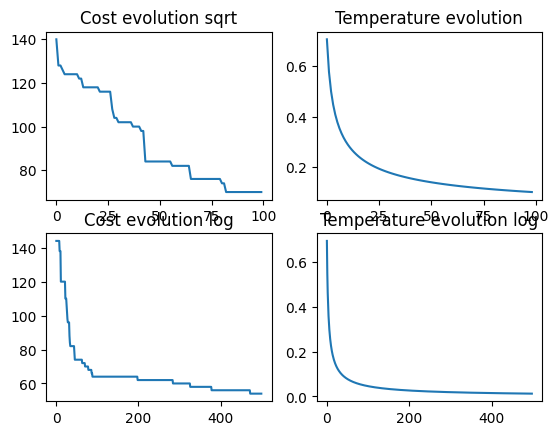

In [168]:
import matplotlib.pyplot as plt 

x_exp,costs,T = run_simulated_annealing(100,20,"sqrt")
fig, ax = plt.subplots(2,2)
ax[0,0].plot(costs)
ax[0,0].set_title("Cost evolution sqrt")
ax[0,1].plot(T)
ax[0,1].set_title("Temperature evolution")

x_exp,costs,T = run_simulated_annealing(500,20,"log")
ax[1,0].plot(costs)
ax[1,0].set_title("Cost evolution log")
ax[1,1].plot(T)
ax[1,1].set_title("Temperature evolution log")


Plot the resulting route in the plane

[20 17 13  5  4  2  1  3  6  7 14 16 15 11 10  8  9 12 18 19 20]


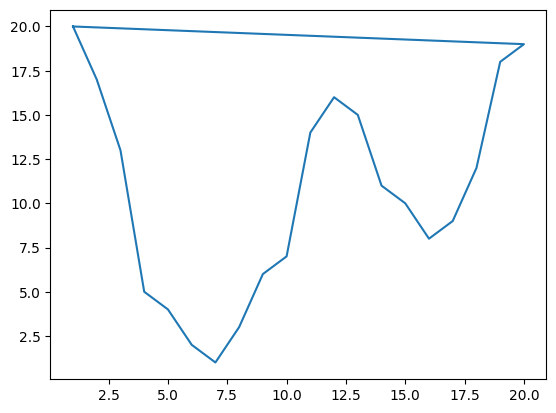

In [177]:
def plot_route(X):
    n = np.linspace(1,len(X),len(X))
    n = np.append(n,n[0])
    X = np.append(X,X[0])
    print(X)
    plt.plot(n,X)
    plt.show()
    return None

plot_route(x_exp)

Now make it with distance-table


In [192]:
def convert_to_cost_matrix(permutation,COSTS):
    #construct the i,j cost-matrix as euclidean distance, ie. row 1 is cost of going from station 0 to station j
    #the diagonal is zero. i is town from - j is town to
    n = permutation.shape[0]
    dists = np.zeros((n,n)).astype(int)
    for i in range(n):
        for j in range(n):
            if(i!=j):
                dists[i,j] = abs(COSTS[i]-COSTS[j])

    return dists 

def compute_MATRIX_cost(permutation,costmat): ###compute cost 
    costmat = convert_to_cost_matrix(permutation,costmat)
    total_cost = np.sum(np.diag(costmat,k=1))
    total_cost += costs[-1,0] #need to travel back to first point 
    return total_cost

def run_simulated_annealing_MATRIX(max_iter, n, temperaturescheme):
    #generate a candidate 
    x = construct_station_permutation(n)
    costs = []
    costmat = np.genfromtxt("cost.csv",delimiter=",")
    costs.append(compute_MATRIX_cost(x,costmat))
    temperatures = []
    acceptance_probability = lambda UYi,UXi,Ti: np.exp(-(UYi-UXi)/Ti)
    temperatureUpdateSqrt = lambda k: 1/(np.sqrt(1+k))
    temperatureUpdateLog = lambda k: np.log(k+1)/k
    
    for i in range(1,max_iter):
        #get iterate temperature
        if(temperaturescheme=="sqrt"):
            T = temperatureUpdateSqrt(i)
        elif(temperaturescheme=="log"):
            T = temperatureUpdateLog(i)

        candidate_flip = (np.random.permutation(n)+1)[0:2] #generate candidate-flip
        #print("Candidate flip: ",candidate_flip)
        #generate candidate-point
        xc = flip_candidate_index(x,candidate_flip)
        #get costs
        original_cost = compute_MATRIX_cost(x,costmat)
        candidate_cost = compute_MATRIX_cost(xc,costmat)
        #print("Costs are: ",original_cost,candidate_cost)
        #print("Temperature is: ",T)
        #acceptance-check:
        if(candidate_cost<original_cost): #acceptance step
            x = xc 
        else:
            #generate acceptance probability
            p = acceptance_probability(candidate_cost,original_cost,T)
            #print("P is: ",p)
            U = np.random.uniform() #lottery draw
            if(U<=p): #accept with probability
                x = xc
            else:
                pass
        costs.append(compute_MATRIX_cost(x,costmat))
        temperatures.append(T)
    return x,costs,temperatures

In [193]:
mat = np.genfromtxt("cost.csv",delimiter=",")
print(mat)
print(mat.shape)

x,costs,temperatures = run_simulated_annealing_MATRIX(1000,20,"sqrt")

[[  0. 225. 110.   8. 257.  22.  83. 231. 277. 243.  94.  30.   4. 265.
  274. 250.  87.  83. 271.  86.]
 [255.   0. 265. 248. 103. 280. 236.  91.   3.  87. 274. 265. 236.   8.
   24.  95. 247. 259.  28. 259.]
 [ 87. 236.   0.  95. 248. 110.  25. 274. 250. 271.   9. 244.  83. 250.
  248. 280.  29.  26. 239.   7.]
 [  8. 280.  83.   0. 236.  28.  91. 239. 280. 259. 103.  23.   6. 280.
  244. 259.  95.  87. 230.  84.]
 [268.  87. 239. 271.   0. 244. 275.   9.  84.  25. 244. 239. 275.  83.
  110.  24. 274. 280.  84. 274.]
 [ 21. 265.  99.  29. 259.   0.  99. 230. 265. 271.  87.   5.  22. 239.
  236. 250.  87.  95. 271.  91.]
 [ 95. 236.  28.  91. 247.  93.   0. 247. 259. 244.  27.  91.  87. 268.
  275. 280.   7.   8. 240.  27.]
 [280.  83. 250. 261.   4. 239. 230.   0. 103.  24. 239. 261. 271.  95.
   87.  21. 274. 255. 110. 280.]
 [247.   9. 280. 274.  84. 255. 259.  99.   0.  87. 255. 274. 280.   3.
   27.  83. 259. 244.  28. 274.]
 [230. 103. 268. 275.  23. 244. 264.  28.  83.   0. 268

ValueError: setting an array element with a sequence.